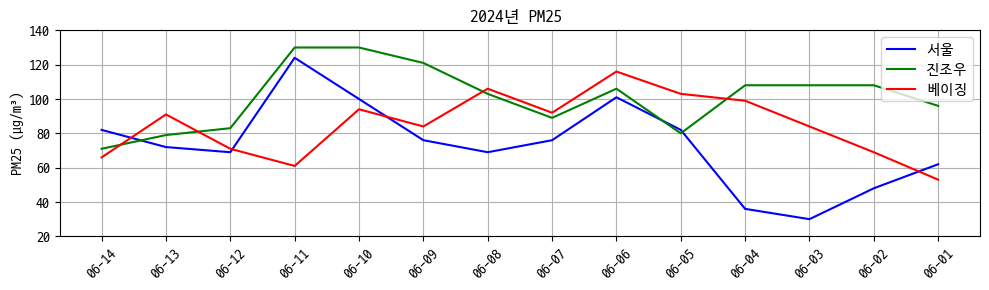

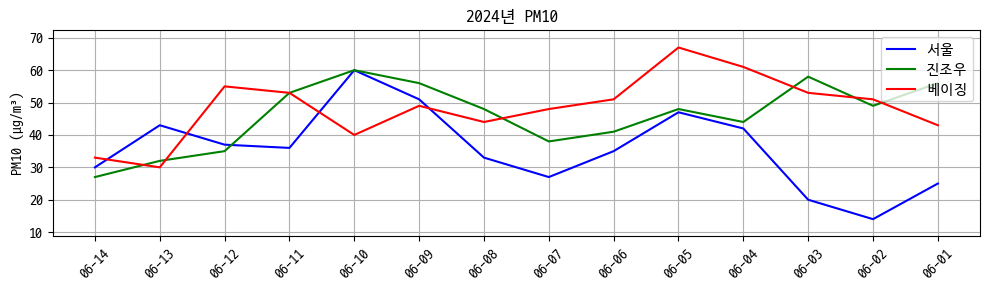

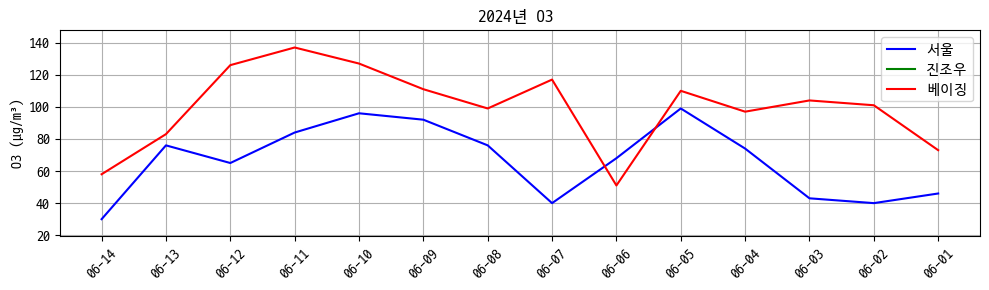

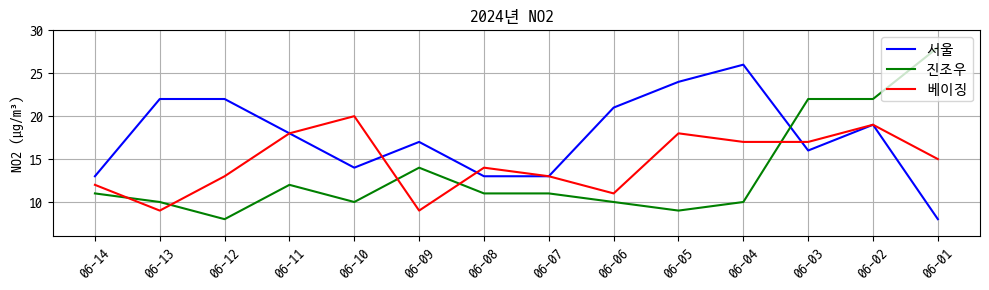

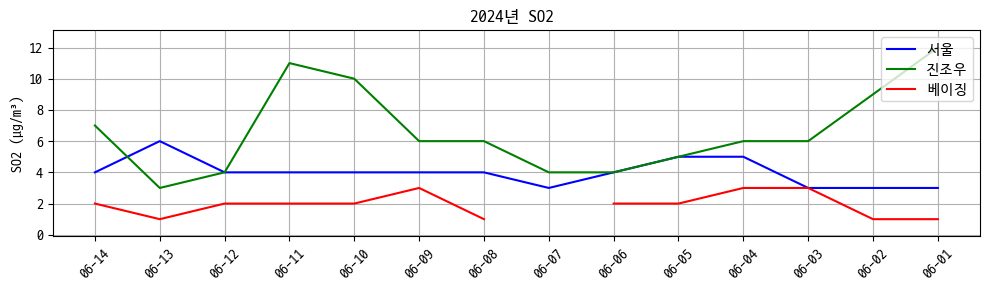

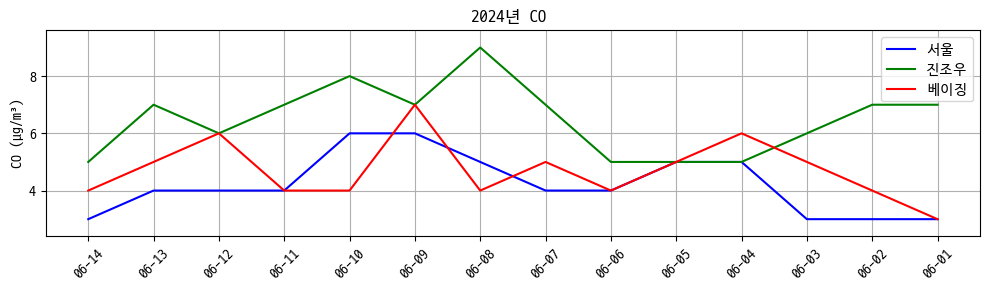

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
# 파일의 인코딩 감지
df1 = pd.read_csv('D:\FILE\서울.csv')
df2 = pd.read_csv('D:\FILE\진조우.csv')
df3 = pd.read_csv('D:\FILE\베이징.csv')
# 예제 데이터 생성 (실제 데이터에 맞게 수정 필요)
서울 = df1
진조우 = df2
베이징 = df3

# 공백 제거 및 소문자로 변환
for data in [서울, 진조우, 베이징]:
    data.columns = data.columns.str.strip().str.lower()

# 날짜 컬럼을 datetime 형식으로 변환
for data in [서울, 진조우, 베이징]:
    data['date'] = pd.to_datetime(data['date'])
dfyear = 2024
dfdate = 6
# 2024년 5월 데이터 필터링
서울_2024 = 서울[(서울['date'].dt.year == dfyear) & (서울['date'].dt.month == dfdate)]
진조우_2024 = 진조우[(진조우['date'].dt.year == dfyear) & (진조우['date'].dt.month == dfdate)]
베이징_2024 = 베이징[(베이징['date'].dt.year == dfyear) & (베이징['date'].dt.month == dfdate)]

# 년도별 색상 설정
colors = ['b', 'g', 'r']
years1 = 서울_2024['date'].dt.year.unique()
years2 = 진조우_2024['date'].dt.year.unique()
years3 = 베이징_2024['date'].dt.year.unique()


# 각 컬럼에 대한 그래프 그리기
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

for pollutant in pollutants:
    plt.rcParams['font.family'] = 'D2coding'
    plt.figure(figsize=(10, 3))
    
    # 서울 그래프 추가
    all_data = []
    for year in years1:
        yearly_data = 서울_2024[서울_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='서울', color='b')
    
    # 진조우 그래프 추가
    for year in years2:
        yearly_data = 진조우_2024[진조우_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='진조우', color='g')
    
    # 베이징 그래프 추가
    for year in years3:
        yearly_data = 베이징_2024[베이징_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='베이징', color='r')
    
    # 데이터에서 최소 및 최대값 계산
    min_value = min(all_data)
    max_value = max(all_data)
    
    # y축 범위 설정
    y_range = max_value - min_value
    plt.ylim(min_value - 0.1 * y_range, max_value + 0.1 * y_range)
    
    plt.ylabel(f'{pollutant.upper()} (μg/m³)')
    plt.title(f'{dfyear}년 ' f'{pollutant.upper()} ')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Beijing data structure:
         date  pm25  pm10   o3  no2  so2  co
0  2024-06-14    66    33   58   12    2   4
1  2024-06-13    91    30   83    9    1   5
2  2024-06-12    71    55  126   13    2   6
3  2024-06-11    61    53  137   18    2   4
4  2024-06-10    94    40  127   20    2   4

Seoul data structure:
         date  pm25  pm10  o3  no2  so2  co
0  2024-06-14    82    30  30   13    4   3
1  2024-06-13    72    43  76   22    6   4
2  2024-06-12    69    37  65   22    4   4
3  2024-06-11   124    36  84   18    4   4
4  2024-06-10   100    60  96   14    4   6

Jinzhou data structure:
         date  pm25  pm10  o3  no2  so2  co
0  2024-06-14    71    27       11    7   5
1  2024-06-13    79    32       10    3   7
2  2024-06-12    83    35        8    4   6
3  2024-06-11   130    53       12   11   7
4  2024-06-10   130    60       10   10   8


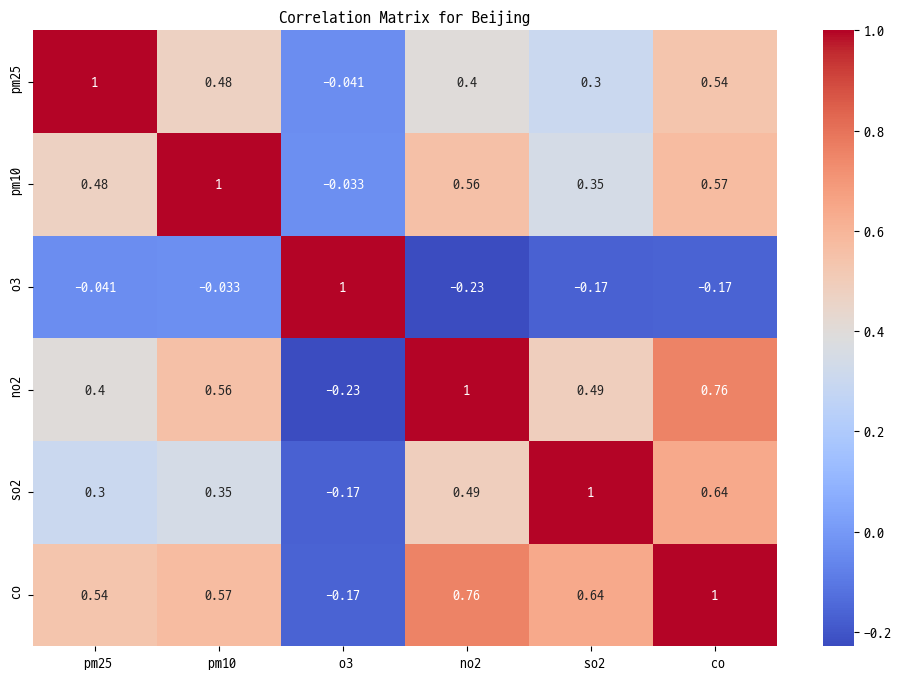

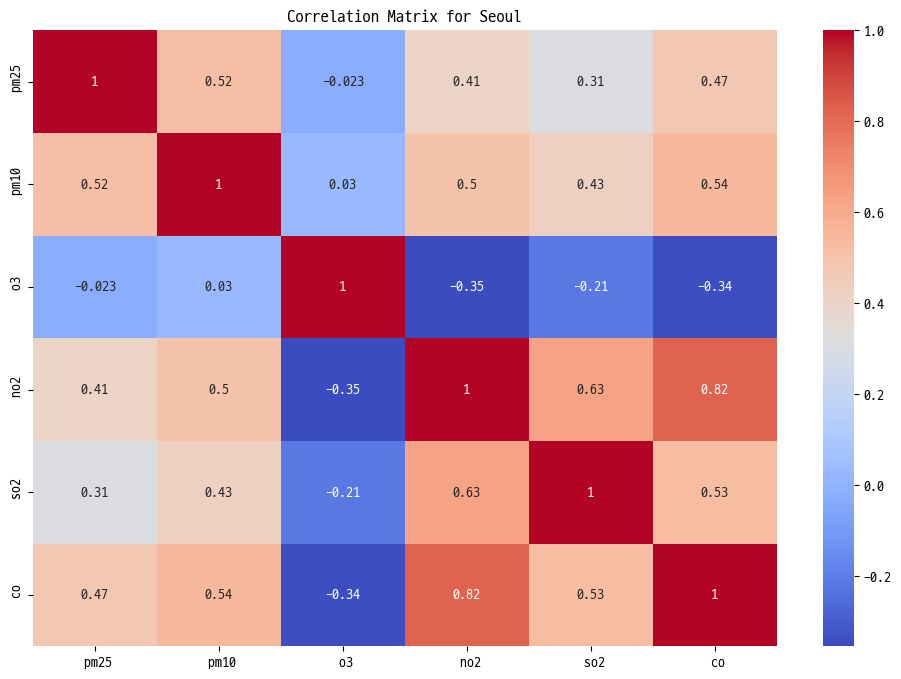

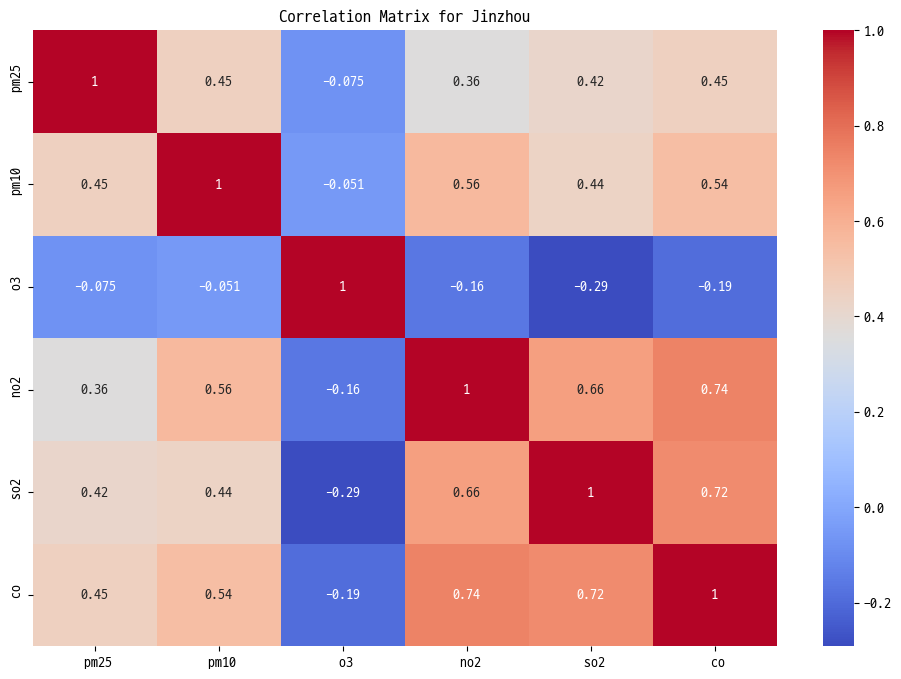


Columns in corr_beijing_seoul:
Index(['date', ' pm25_beijing', ' pm10_beijing', ' o3_beijing', ' no2_beijing',
       ' so2_beijing', ' co_beijing', ' pm25_seoul', ' pm10_seoul',
       ' o3_seoul', ' no2_seoul', ' so2_seoul', ' co_seoul'],
      dtype='object')

Columns in corr_jinzhou_seoul:
Index(['date', ' pm25_jinzhou', ' pm10_jinzhou', ' o3_jinzhou', ' no2_jinzhou',
       ' so2_jinzhou', ' co_jinzhou', ' pm25_seoul', ' pm10_seoul',
       ' o3_seoul', ' no2_seoul', ' so2_seoul', ' co_seoul'],
      dtype='object')

PM2.5 Prediction Model Performance:
Mean Squared Error: 1052.0758106004337
R^2 Score: 0.09570113501749433
Index(['date', 'pm25_beijing', 'pm10_beijing', 'o3_beijing', 'no2_beijing',
       'so2_beijing', 'co_beijing', 'pm25_seoul', 'pm10_seoul', 'o3_seoul',
       'no2_seoul', 'so2_seoul', 'co_seoul'],
      dtype='object')

PM10 Prediction Model Performance:
Mean Squared Error: 533.7439905910544
R^2 Score: 0.14480827153117537

PM10 Prediction Model Performance:
Mean

C:\Users\human\AppData\Local\Temp\ipykernel_2372\2452761870.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pm25.replace(' ', np.nan, inplace=True)
C:\Users\human\AppData\Local\Temp\ipykernel_2372\2452761870.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pm25.fillna(X_pm25.astype(float).mean(), inplace=True)
C:\Users\human\AppData\Local\Temp\ipykernel_2372\2452761870.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

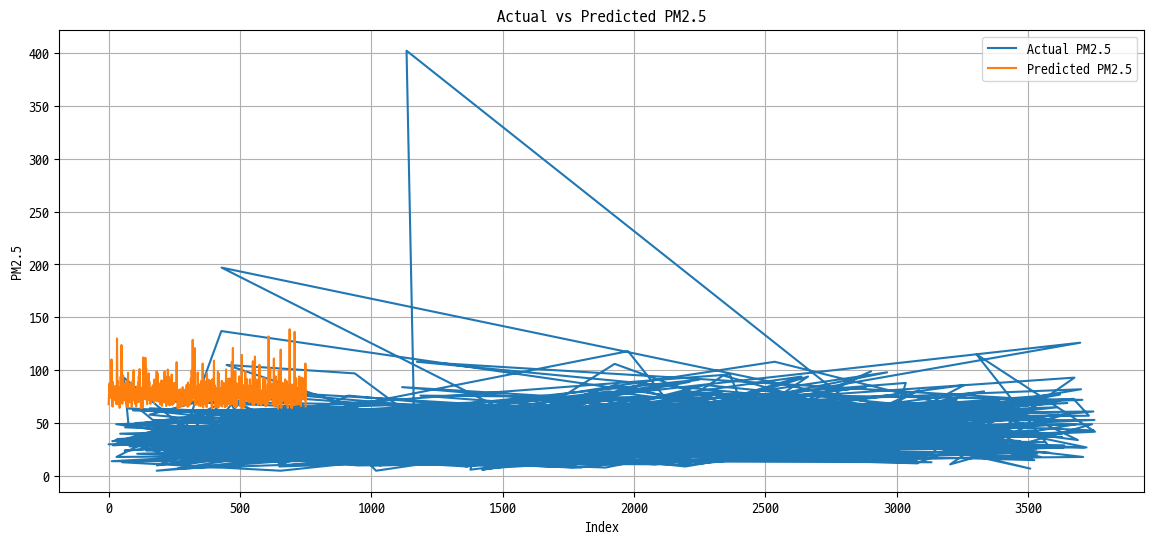

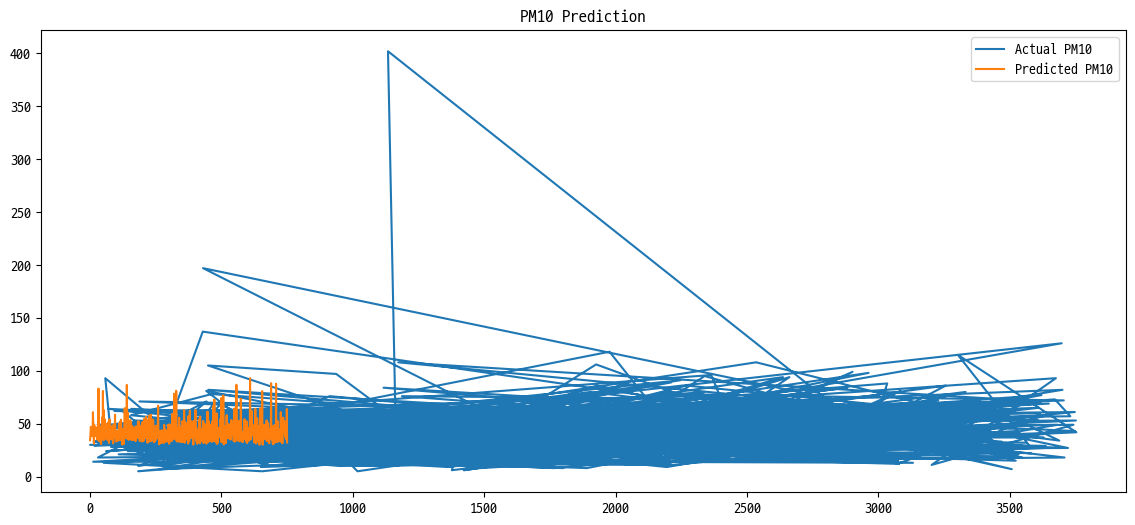

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- pm10_beijing
- pm25_beijing
Feature names seen at fit time, yet now missing:
-  pm10_beijing
-  pm25_beijing


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random

# 데이터 불러오기
beijing = pd.read_csv('D:\\FILE\\베이징.csv')
seoul = pd.read_csv('D:\\FILE\\서울.csv')
jinzhou = pd.read_csv('D:\\FILE\\진조우.csv')

# 데이터 구조 확인
print("Beijing data structure:")
print(beijing.head())
print("\nSeoul data structure:")
print(seoul.head())
print("\nJinzhou data structure:")
print(jinzhou.head())

# 날짜 열을 datetime 형식으로 변환
beijing['date'] = pd.to_datetime(beijing['date'], errors='coerce')
seoul['date'] = pd.to_datetime(seoul['date'], errors='coerce')
jinzhou['date'] = pd.to_datetime(jinzhou['date'], errors='coerce')

# 숫자 데이터만 추출하고 비어있는 값을 NaN으로 대체
beijing_numeric = beijing.drop(columns=['date']).apply(pd.to_numeric, errors='coerce')
seoul_numeric = seoul.drop(columns=['date']).apply(pd.to_numeric, errors='coerce')
jinzhou_numeric = jinzhou.drop(columns=['date']).apply(pd.to_numeric, errors='coerce')

# ' '을 NaN으로 변환
beijing_numeric.replace(' ', np.nan, inplace=True)
seoul_numeric.replace(' ', np.nan, inplace=True)
jinzhou_numeric.replace(' ', np.nan, inplace=True)

# NaN 값을 평균값으로 대체
beijing_numeric.fillna(beijing_numeric.mean(), inplace=True)
seoul_numeric.fillna(seoul_numeric.mean(), inplace=True)
jinzhou_numeric.fillna(jinzhou_numeric.mean(), inplace=True)

# 각 도시의 PM2.5와 PM10의 상관관계 분석
plt.figure(figsize=(12, 8))
sns.heatmap(beijing_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Beijing')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(seoul_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Seoul')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(jinzhou_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Jinzhou')
plt.show()

# 상관관계 파악을 위해 병합
corr_beijing_seoul = pd.merge(beijing, seoul, on='date', suffixes=('_beijing', '_seoul'))
corr_jinzhou_seoul = pd.merge(jinzhou, seoul, on='date', suffixes=('_jinzhou', '_seoul'))

# 병합된 데이터프레임의 열 이름 확인
print("\nColumns in corr_beijing_seoul:")
print(corr_beijing_seoul.columns)

print("\nColumns in corr_jinzhou_seoul:")
print(corr_jinzhou_seoul.columns)

# 예측 모델 생성 (서울의 PM2.5와 PM10을 예측)
# PM2.5 예측 모델
X_pm25 = corr_beijing_seoul[[' pm25_beijing', ' pm10_beijing']]  # 실제 데이터프레임의 컬럼 이름으로 수정
y_pm25 = corr_beijing_seoul[' pm25_seoul']  # 서울의 PM2.5

# 공백을 NaN으로 변환
X_pm25.replace(' ', np.nan, inplace=True)
y_pm25.replace(' ', np.nan, inplace=True)

# NaN 값을 평균값으로 대체
X_pm25.fillna(X_pm25.astype(float).mean(), inplace=True)
y_pm25.fillna(y_pm25.astype(float).mean(), inplace=True)

X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

model_pm25 = LinearRegression()
model_pm25.fit(X_train_pm25, y_train_pm25)

y_pred_pm25 = model_pm25.predict(X_test_pm25)

print(f"\nPM2.5 Prediction Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test_pm25, y_pred_pm25)}")
print(f"R^2 Score: {r2_score(y_test_pm25, y_pred_pm25)}")

# 공백을 포함한 컬럼 이름들을 모두 수정
corr_beijing_seoul.columns = corr_beijing_seoul.columns.str.replace(' ', '')

# 수정된 컬럼 이름 확인
print(corr_beijing_seoul.columns)

# PM10 예측 모델을 위한 데이터 준비
X_pm10 = corr_beijing_seoul[['pm25_beijing', 'pm10_beijing']]
y_pm10 = corr_beijing_seoul['pm10_seoul']

# 공백을 NaN으로 변환
X_pm10.replace(' ', np.nan, inplace=True)
y_pm10.replace(' ', np.nan, inplace=True)

# NaN 값을 평균값으로 대체
X_pm10.fillna(X_pm10.astype(float).mean(), inplace=True)
y_pm10.fillna(y_pm10.astype(float).mean(), inplace=True)

X_train_pm10, X_test_pm10, y_train_pm10, y_test_pm10 = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)

model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

y_pred_pm10 = model_pm10.predict(X_test_pm10)

print(f"\nPM10 Prediction Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test_pm10, y_pred_pm10)}")
print(f"R^2 Score: {r2_score(y_test_pm10, y_pred_pm10)}")

# PM10 예측 모델
X = corr_beijing_seoul[['pm25_beijing', 'pm10_beijing']]  # 베이징의 PM2.5, PM10을 사용하여 예측
y = corr_beijing_seoul['pm10_seoul']  # 서울의 PM10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, y_train에서 공백을 NaN으로 변환 (이미 공백이 NaN으로 변환되어 있다고 가정)
X_train.replace(' ', np.nan, inplace=True)
y_train.replace(' ', np.nan, inplace=True)
X_test.replace(' ', np.nan, inplace=True)
y_test.replace(' ', np.nan, inplace=True)

# NaN 값을 평균값으로 대체
X_train.fillna(X_train.astype(float).mean(), inplace=True)
y_train.fillna(y_train.astype(float).mean(), inplace=True)
X_test.fillna(X_test.astype(float).mean(), inplace=True)
y_test.fillna(y_test.astype(float).mean(), inplace=True)

# PM10 예측 모델 학습
model_pm10 = LinearRegression()
model_pm10.fit(X_train, y_train)

# 예측 결과 출력
y_pred = model_pm10.predict(X_test)

print(f"\nPM10 Prediction Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_pm10)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_pm10)}")

# Convert y_test and y_pred_pm25 to float if they are not already
y_test = y_test.astype(float)
y_pred_pm25 = y_pred_pm25.astype(float)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual PM2.5')
plt.plot(y_pred_pm25, label='Predicted PM2.5')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual PM10')
plt.plot(y_pred_pm10, label='Predicted PM10')
plt.legend()
plt.title('PM10 Prediction')
plt.show()

# 서울의 PM2.5와 PM10 예측 (2024.06.22 ~ 2024.06.30)
future_dates = pd.date_range(start='2024-06-22', end='2024-06-30').to_frame(index=False, name='date')

# 베이징과 진조우의 미래 데이터를 임의로 생성 (실제 데이터를 사용할 수 있다면 그것을 사용)
future_beijing = pd.DataFrame({
    'date': future_dates['date'],
    'pm25_beijing': [random.randint(50, 150) for _ in range(len(future_dates))],
    'pm10_beijing': [random.randint(30, 100) for _ in range(len(future_dates))]
})

future_jinzhou = pd.DataFrame({
    'date': future_dates['date'],
    'pm25_jinzhou': [random.randint(40, 130) for _ in range(len(future_dates))],
    'pm10_jinzhou': [random.randint(25, 90) for _ in range(len(future_dates))]
})

# 미래 데이터 병합
future_data = pd.merge(future_beijing, future_jinzhou, on='date')

# 서울의 PM2.5와 PM10 예측
future_X_pm25 = future_data[['pm25_beijing', 'pm10_beijing']]
future_pred_pm25 = model_pm25.predict(future_X_pm25)

future_X_pm10 = future_data[['pm25_beijing', 'pm10_beijing']]
future_pred_pm10 = model_pm10.predict(future_X_pm10)

# 결과 출력
future_data['Predicted_PM25'] = future_pred_pm25
future_data['Predicted_PM10'] = future_pred_pm10

print("\nFuture PM2.5 and PM10 predictions for Seoul (2024.06.22 ~ 2024.06.30):")
print(future_data[['date', 'Predicted_PM25', 'Predicted_PM10']])


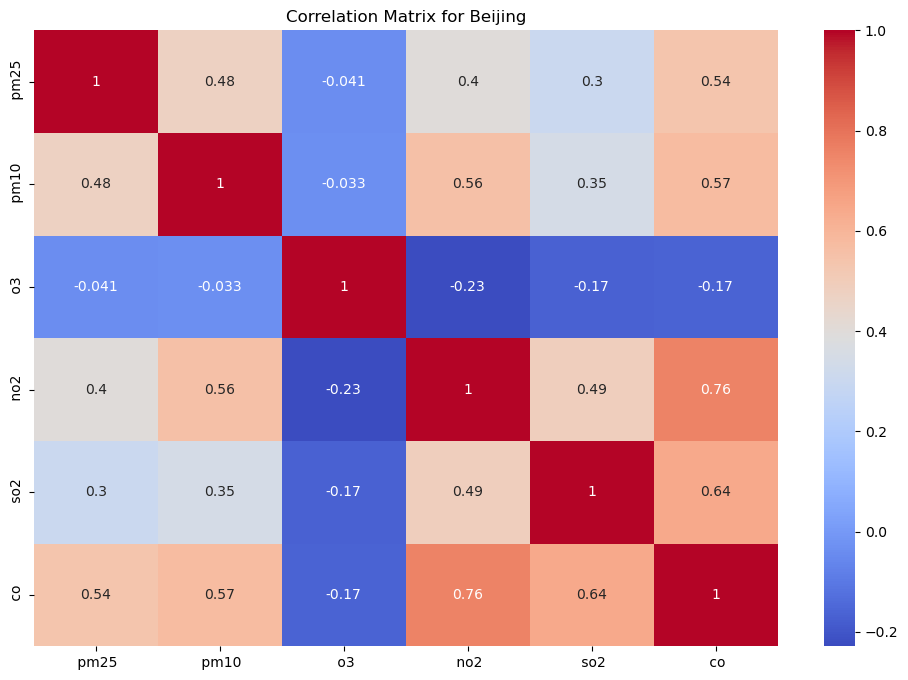

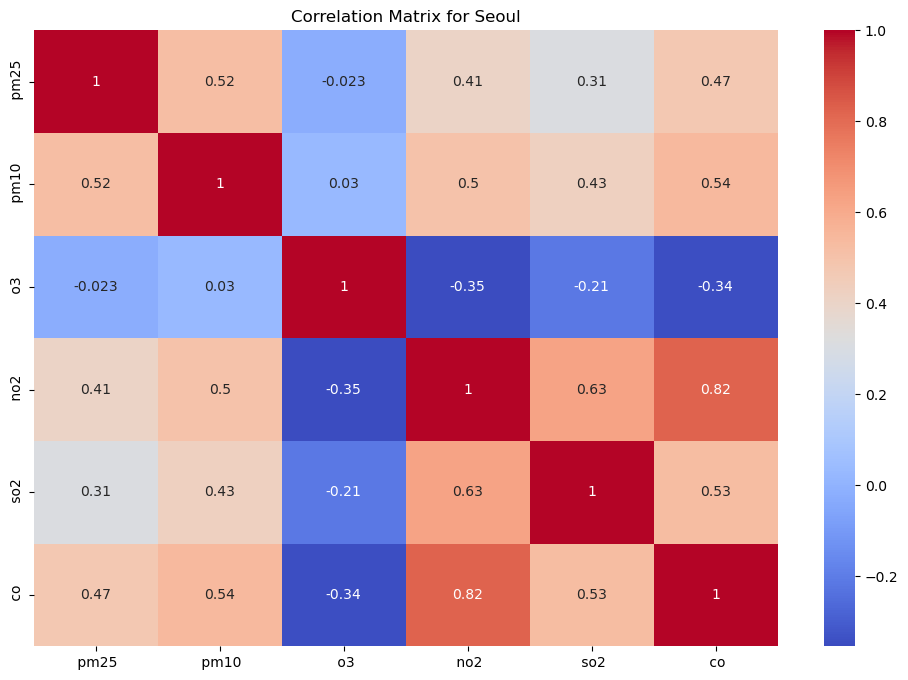

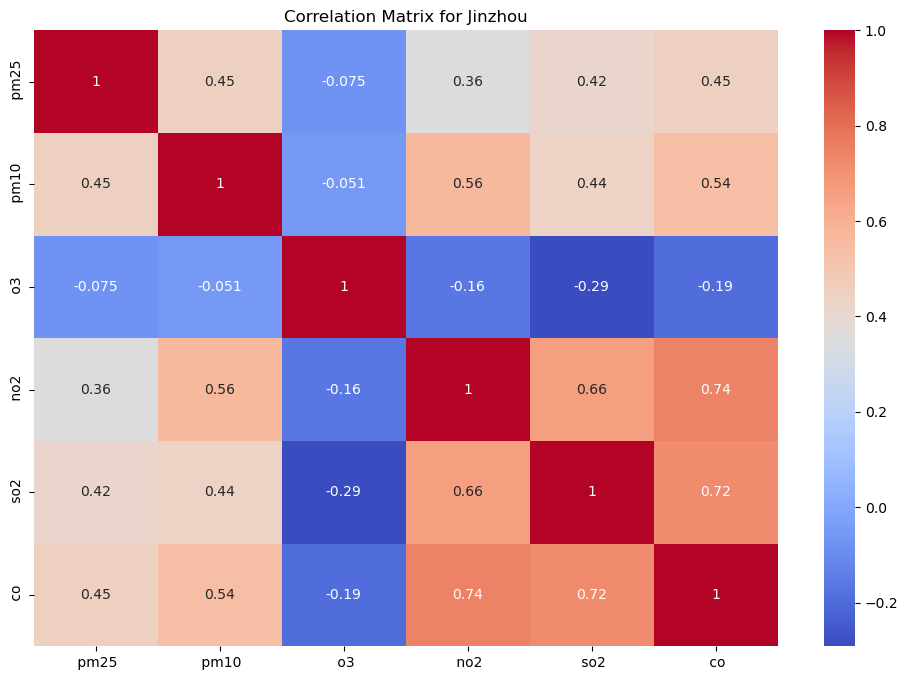

C:\Users\human\AppData\Local\Temp\ipykernel_10520\850816660.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(' ', np.nan, inplace=True)
C:\Users\human\AppData\Local\Temp\ipykernel_10520\850816660.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.astype(float).mean(), inplace=True)
C:\Users\human\AppData\Local\Temp\ipykernel_10520\850816660.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(' ', n


PM2.5 Prediction Model Performance:
Mean Squared Error: 1113.8350128633654
R^2 Score: 0.04261676985494922

PM10 Prediction Model Performance:
Mean Squared Error: 579.8050576184909
R^2 Score: 0.0710068906806085


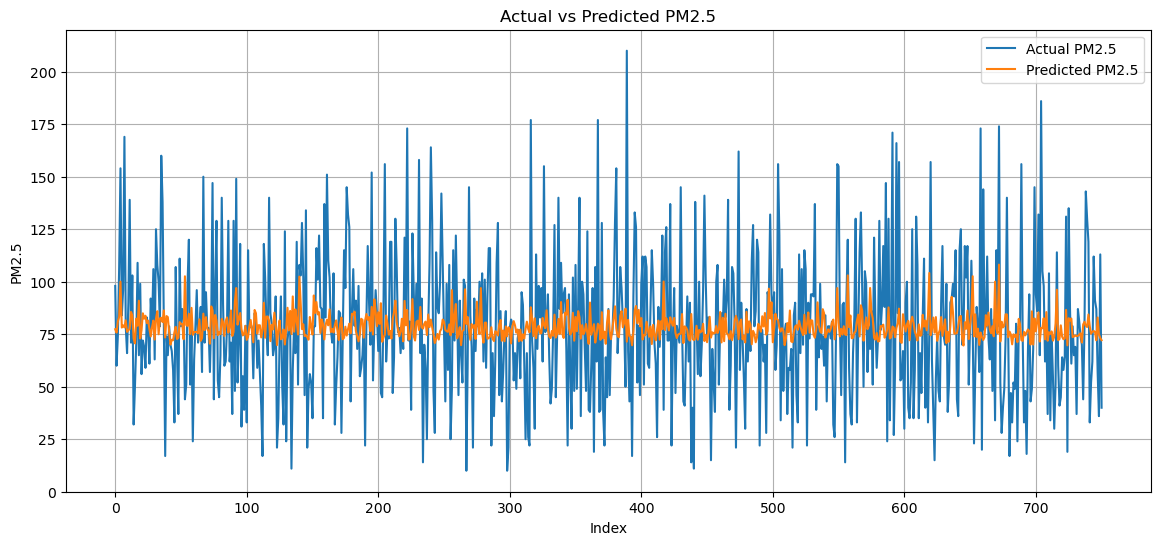

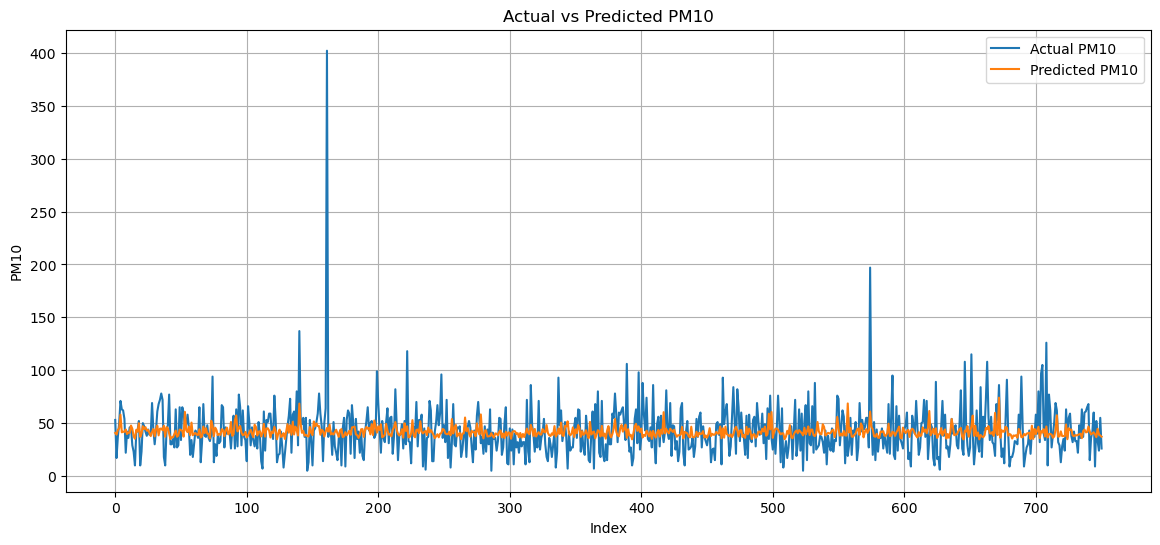


Future PM2.5 and PM10 predictions for Seoul (2024.06.22 ~ 2024.06.30):
        date  Predicted_PM25  Predicted_PM10
0 2024-06-22       79.853776       42.416070
1 2024-06-23       80.024824       43.096150
2 2024-06-24       78.202764       40.775019
3 2024-06-25       81.770330       44.606097
4 2024-06-26       80.505231       43.010017
5 2024-06-27       82.411849       44.932993
6 2024-06-28       79.125697       42.789662
7 2024-06-29       79.407179       42.698686
8 2024-06-30       76.668051       41.013355


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random

# 데이터 불러오기
beijing = pd.read_csv('D:\\FILE\\베이징.csv')
seoul = pd.read_csv('D:\\FILE\\서울.csv')
jinzhou = pd.read_csv('D:\\FILE\\진조우.csv')

# 날짜 열을 datetime 형식으로 변환
beijing['date'] = pd.to_datetime(beijing['date'], errors='coerce')
seoul['date'] = pd.to_datetime(seoul['date'], errors='coerce')
jinzhou['date'] = pd.to_datetime(jinzhou['date'], errors='coerce')

# 숫자 데이터만 추출하고 비어있는 값을 NaN으로 대체하는 함수
def preprocess(df):
    numeric_df = df.drop(columns=['date']).apply(pd.to_numeric, errors='coerce')
    numeric_df.replace(' ', np.nan, inplace=True)
    numeric_df.fillna(numeric_df.mean(), inplace=True)
    # 컬럼명 소문자로 변환
    numeric_df.columns = map(str.lower, numeric_df.columns)
    return numeric_df

# 각 도시의 데이터프레임을 숫자로 변환하여 처리
beijing_numeric = preprocess(beijing)
seoul_numeric = preprocess(seoul)
jinzhou_numeric = preprocess(jinzhou)

# 각 도시의 PM2.5와 PM10의 상관관계 분석
plt.figure(figsize=(12, 8))
sns.heatmap(beijing_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Beijing')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(seoul_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Seoul')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(jinzhou_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Jinzhou')
plt.show()

# 서울과 다른 도시들의 데이터 병합
corr_beijing_seoul = pd.merge(beijing_numeric, seoul_numeric, left_index=True, right_index=True, suffixes=('_beijing', '_seoul'))
corr_jinzhou_seoul = pd.merge(jinzhou_numeric, seoul_numeric, left_index=True, right_index=True, suffixes=('_jinzhou', '_seoul'))

# PM2.5 예측 모델
X_pm25 = corr_beijing_seoul[[' pm25_beijing', ' pm10_beijing']]
y_pm25 = corr_beijing_seoul[' pm25_seoul']

# PM10 예측 모델
X_pm10 = corr_beijing_seoul[[' pm25_beijing', ' pm10_beijing']]
y_pm10 = corr_beijing_seoul[' pm10_seoul']

# 데이터 준비
def prepare_data(X, y):
    X.replace(' ', np.nan, inplace=True)
    X.fillna(X.astype(float).mean(), inplace=True)
    y.replace(' ', np.nan, inplace=True)
    y.fillna(y.astype(float).mean(), inplace=True)
    return X.astype(float), y.astype(float)

X_pm25, y_pm25 = prepare_data(X_pm25, y_pm25)
X_pm10, y_pm10 = prepare_data(X_pm10, y_pm10)

# 데이터 분할
X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)
X_train_pm10, X_test_pm10, y_train_pm10, y_test_pm10 = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model_pm25 = LinearRegression()
model_pm25.fit(X_train_pm25, y_train_pm25)

model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

# 예측
y_pred_pm25 = model_pm25.predict(X_test_pm25)
y_pred_pm10 = model_pm10.predict(X_test_pm10)

# 성능 평가
print(f"\nPM2.5 Prediction Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test_pm25, y_pred_pm25)}")
print(f"R^2 Score: {r2_score(y_test_pm25, y_pred_pm25)}")

print(f"\nPM10 Prediction Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test_pm10, y_pred_pm10)}")
print(f"R^2 Score: {r2_score(y_test_pm10, y_pred_pm10)}")

# 예측 결과 시각화
plt.figure(figsize=(14, 6))
plt.plot(y_test_pm25.values, label='Actual PM2.5')
plt.plot(y_pred_pm25, label='Predicted PM2.5')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(y_test_pm10.values, label='Actual PM10')
plt.plot(y_pred_pm10, label='Predicted PM10')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM10')
plt.title('Actual vs Predicted PM10')
plt.grid(True)
plt.show()

# 미래 예측
future_beijing = pd.DataFrame({
    'date': pd.date_range(start='2024-06-22', end='2024-06-30'),
    ' pm25_beijing': [random.randint(50, 150) for _ in range(9)],
    ' pm10_beijing': [random.randint(30, 100) for _ in range(9)]
})

future_jinzhou = pd.DataFrame({
    'date': pd.date_range(start='2024-06-22', end='2024-06-30'),
    ' pm25_jinzhou': [random.randint(40, 130) for _ in range(9)],
    ' pm10_jinzhou': [random.randint(25, 90) for _ in range(9)]
})

future_data = pd.merge(future_beijing, future_jinzhou, on='date')

future_X_pm25 = future_data[[' pm25_beijing', ' pm10_beijing']]
future_X_pm10 = future_data[[' pm25_beijing', ' pm10_beijing']]

future_pred_pm25 = model_pm25.predict(future_X_pm25)
future_pred_pm10 = model_pm10.predict(future_X_pm10)

future_data['Predicted_PM25'] = future_pred_pm25
future_data['Predicted_PM10'] = future_pred_pm10

print("\nFuture PM2.5 and PM10 predictions for Seoul (2024.06.22 ~ 2024.06.30):")
print(future_data[['date', 'Predicted_PM25', 'Predicted_PM10']])


C:\Users\human\AppData\Local\Temp\ipykernel_20604\2352204003.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_pm25['pm25'] = pd.to_numeric(beijing_pm25['pm25'], errors='coerce')
C:\Users\human\AppData\Local\Temp\ipykernel_20604\2352204003.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_pm25['pm25'] = pd.to_numeric(seoul_pm25['pm25'], errors='coerce')


베이징의 미세먼지가 서울에 도착하는 데 걸리는 시간: 1.00일


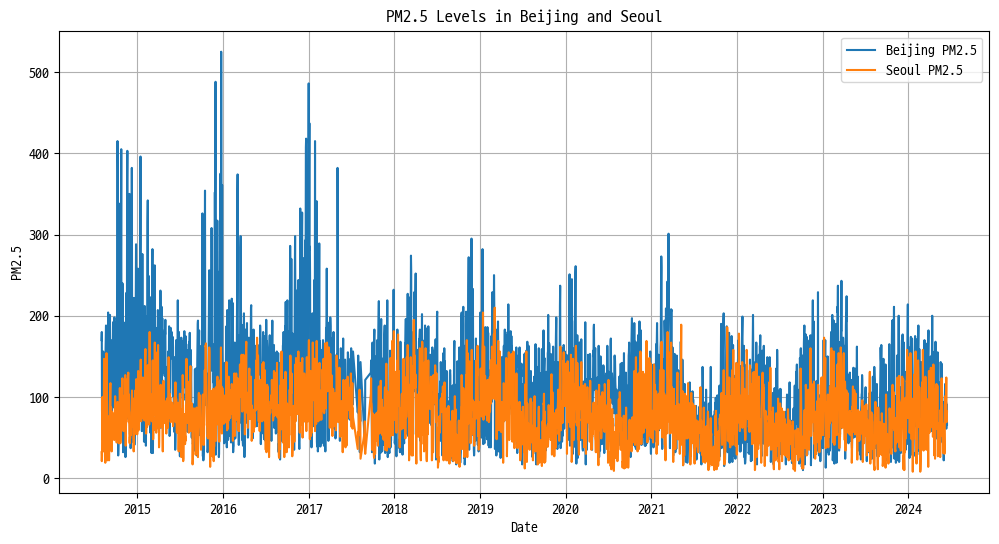

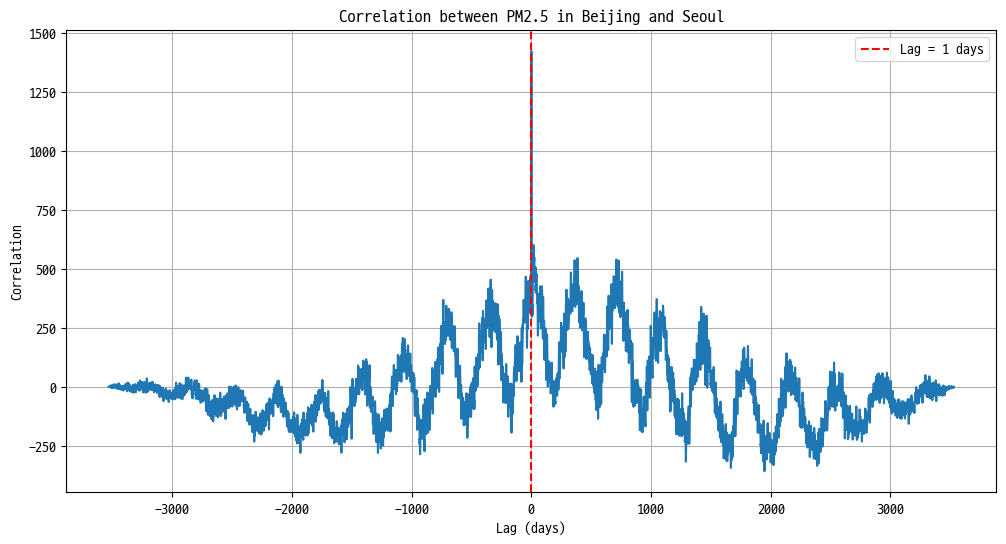

,date,pm25_beijing,pm25_seoul
3531,2024-06-14,66.0,82.0
3530,2024-06-13,91.0,72.0
3529,2024-06-12,71.0,69.0
3528,2024-06-11,61.0,124.0
3527,2024-06-10,94.0,100.0
3526,2024-06-09,84.0,76.0
3525,2024-06-08,106.0,69.0
3524,2024-06-07,92.0,76.0
3523,2024-06-06,116.0,101.0
3522,2024-06-05,103.0,82.0


In [62]:

import pandas as pd
import numpy as np
from scipy.signal import correlate

# CSV 파일 읽기
beijing_df = pd.read_csv('D:\FILE\\베이징.csv')
seoul_df = pd.read_csv('D:\FILE\\서울.csv')

# 공백 제거
beijing_df.columns = beijing_df.columns.str.strip()
seoul_df.columns = seoul_df.columns.str.strip()

# 날짜 형식을 datetime으로 변환
beijing_df['date'] = pd.to_datetime(beijing_df['date'])
seoul_df['date'] = pd.to_datetime(seoul_df['date'])

# 날짜를 기준으로 정렬
beijing_df = beijing_df.sort_values(by='date').reset_index(drop=True)
seoul_df = seoul_df.sort_values(by='date').reset_index(drop=True)

# PM2.5 농도만 추출하여 새로운 데이터프레임 생성
beijing_pm25 = beijing_df[['date', 'pm25']]
seoul_pm25 = seoul_df[['date', 'pm25']]

# PM2.5 값을 숫자로 변환 (변환 불가한 값은 NaN으로 설정)
beijing_pm25['pm25'] = pd.to_numeric(beijing_pm25['pm25'], errors='coerce')
seoul_pm25['pm25'] = pd.to_numeric(seoul_pm25['pm25'], errors='coerce')

# NaN 값 제거
beijing_pm25 = beijing_pm25.dropna()
seoul_pm25 = seoul_pm25.dropna()

# 공통 날짜 범위 확인
common_dates = beijing_pm25.merge(seoul_pm25, on='date', suffixes=('_beijing', '_seoul'))
beijing_pm25_common = common_dates['pm25_beijing']
seoul_pm25_common = common_dates['pm25_seoul']


# 상관 분석을 위한 데이터 정규화
beijing_pm25_normalized = (beijing_pm25_common - np.mean(beijing_pm25_common)) / np.std(beijing_pm25_common)
seoul_pm25_normalized = (seoul_pm25_common - np.mean(seoul_pm25_common)) / np.std(seoul_pm25_common)

# 상관 분석 수행
correlation = correlate(seoul_pm25_normalized, beijing_pm25_normalized, mode='full')
lags = np.arange(-len(beijing_pm25_normalized) + 1, len(beijing_pm25_normalized))

# 최대 상관관계 값 찾기
lag_max = lags[np.argmax(correlation)]
corr_max = correlation[np.argmax(correlation)]

# 최대 상관관계 근처의 값들로 보간하여 정밀한 lag 계산
fine_lags = np.linspace(lag_max - 1, lag_max + 1, num=1000)
fine_correlations = np.interp(fine_lags, lags, correlation)
fine_lag_max = fine_lags[np.argmax(fine_correlations)]

print(f"베이징의 미세먼지가 서울에 도착하는 데 걸리는 시간: {fine_lag_max:.2f}일")

# 시계열 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(common_dates['date'], beijing_pm25_common, label='베이징 PM2.5')
plt.plot(common_dates['date'], seoul_pm25_common, label='서울 PM2.5')
plt.xlabel('날짜')
plt.ylabel('PM2.5')
plt.title('베이징과 서울의 PM2.5 농도 변화')
plt.legend()
plt.grid(True)
plt.show()

# 상관 분석 결과 시각화
lags = np.arange(-len(beijing_pm25_common) + 1, len(beijing_pm25_common))
plt.figure(figsize=(12, 6))
plt.plot(lags, correlation)
plt.axvline(x=lag, color='r', linestyle='--', label=f'Lag = {lag} days')
plt.xlabel('지연 (일)')
plt.ylabel('상관관계')
plt.title('베이징과 서울의 PM2.5 농도의 상관관계 분석')
plt.legend()
plt.grid(True)
plt.show()

# 공통 날짜 데이터 역순 정렬
common_dates = common_dates.sort_values(by='date', ascending=False)

# 결과 표 출력
common_dates.head(10) # 상위 10개의 공통 날짜 데이터 출력

C:\Users\human\AppData\Local\Temp\ipykernel_20604\3876757594.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_pm10['pm10'] = pd.to_numeric(beijing_pm10['pm10'], errors='coerce')
C:\Users\human\AppData\Local\Temp\ipykernel_20604\3876757594.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_pm10['pm10'] = pd.to_numeric(seoul_pm10['pm10'], errors='coerce')


베이징의 미세먼지가 서울에 도착하는 데 걸리는 시간: 1.00일


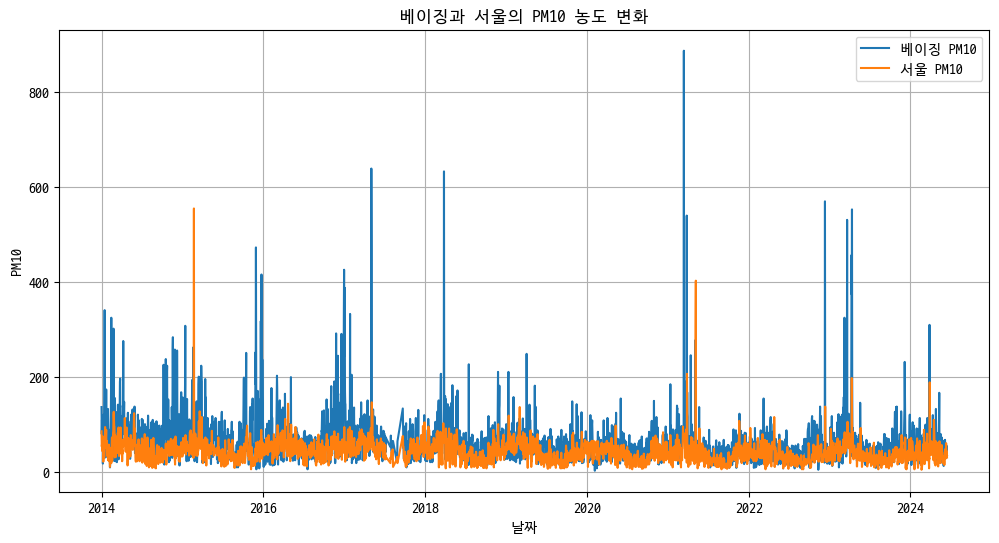

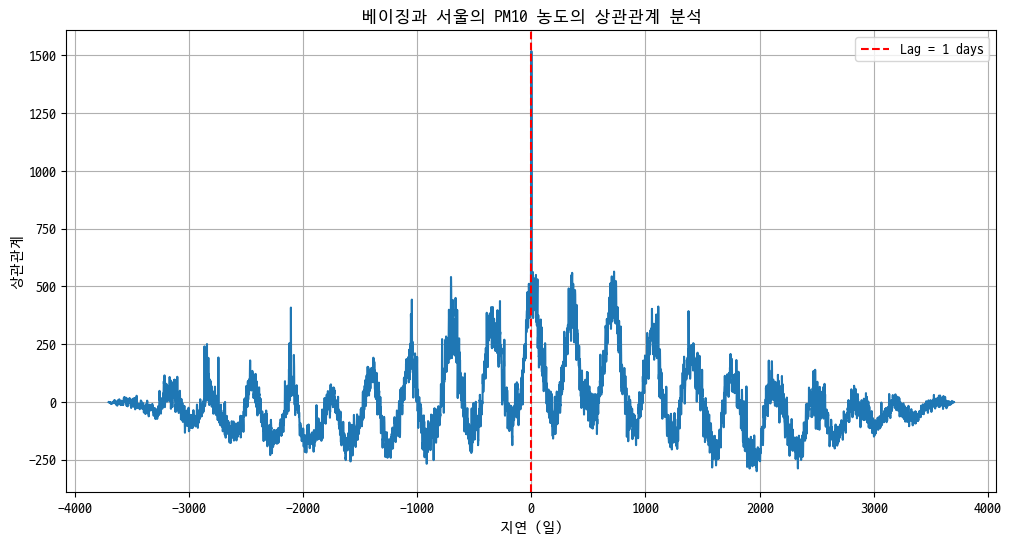

,date,pm10_beijing,pm10_seoul
3702,2024-06-14,33.0,30.0
3701,2024-06-13,30.0,43.0
3700,2024-06-12,55.0,37.0
3699,2024-06-11,53.0,36.0
3698,2024-06-10,40.0,60.0
3697,2024-06-09,49.0,51.0
3696,2024-06-08,44.0,33.0
3695,2024-06-07,48.0,27.0
3694,2024-06-06,51.0,35.0
3693,2024-06-05,67.0,47.0


In [68]:
import pandas as pd
import numpy as np
from scipy.signal import correlate

# CSV 파일 읽기
beijing_df = pd.read_csv('D:\FILE\\베이징.csv')
seoul_df = pd.read_csv('D:\FILE\\서울.csv')

# 공백 제거
beijing_df.columns = beijing_df.columns.str.strip()
seoul_df.columns = seoul_df.columns.str.strip()

# 날짜 형식을 datetime으로 변환
beijing_df['date'] = pd.to_datetime(beijing_df['date'])
seoul_df['date'] = pd.to_datetime(seoul_df['date'])

# 날짜를 기준으로 정렬
beijing_df = beijing_df.sort_values(by='date').reset_index(drop=True)
seoul_df = seoul_df.sort_values(by='date').reset_index(drop=True)

# PM10 농도만 추출하여 새로운 데이터프레임 생성
beijing_pm10 = beijing_df[['date', 'pm10']]
seoul_pm10 = seoul_df[['date', 'pm10']]

# PM10 값을 숫자로 변환 (변환 불가한 값은 NaN으로 설정)
beijing_pm10['pm10'] = pd.to_numeric(beijing_pm10['pm10'], errors='coerce')
seoul_pm10['pm10'] = pd.to_numeric(seoul_pm10['pm10'], errors='coerce')

# NaN 값 제거
beijing_pm10 = beijing_pm10.dropna()
seoul_pm10 = seoul_pm10.dropna()

# 공통 날짜 범위 확인
common_dates_10 = beijing_pm10.merge(seoul_pm10, on='date', suffixes=('_beijing', '_seoul'))
beijing_pm10_common = common_dates_10['pm10_beijing']
seoul_pm10_common = common_dates_10['pm10_seoul']

# 상관 분석을 위한 데이터 정규화
beijing_pm10_normalized = (beijing_pm10_common - np.mean(beijing_pm10_common)) / np.std(beijing_pm10_common)
seoul_pm10_normalized = (seoul_pm10_common - np.mean(seoul_pm10_common)) / np.std(seoul_pm10_common)

# 상관 분석 수행
correlation_10 = correlate(seoul_pm10_normalized, beijing_pm10_normalized, mode='full')
lags_10 = np.arange(-len(beijing_pm10_normalized) + 1, len(beijing_pm10_normalized))

# 최대 상관관계 값 찾기
lag_max_10 = lags_10[np.argmax(correlation_10)]
corr_max_10 = correlation[np.argmax(correlation_10)]

# 최대 상관관계 근처의 값들로 보간하여 정밀한 lag 계산
fine_lags_10 = np.linspace(lag_max - 1, lag_max + 1, num=1000)
fine_correlations_10 = np.interp(fine_lags_10, lags, correlation_10)
fine_lag_max_10 = fine_lags_10[np.argmax(fine_correlations_10)]

print(f"베이징의 미세먼지가 서울에 도착하는 데 걸리는 시간: {fine_lag_max:.2f}일")

# 시계열 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(common_dates_10['date'], beijing_pm10_common, label='베이징 PM10')
plt.plot(common_dates_10['date'], seoul_pm10_common, label='서울 PM10')
plt.xlabel('날짜')
plt.ylabel('PM10')
plt.title('베이징과 서울의 PM10 농도 변화')
plt.legend()
plt.grid(True)
plt.show()

# 상관 분석 결과 시각화
lags = np.arange(-len(beijing_pm10_common) + 1, len(beijing_pm10_common))
plt.figure(figsize=(12, 6))
plt.plot(lags_10, correlation_10)
plt.axvline(x=lag, color='r', linestyle='--', label=f'Lag = {lag} days')
plt.xlabel('지연 (일)')
plt.ylabel('상관관계')
plt.title('베이징과 서울의 PM10 농도의 상관관계 분석')
plt.legend()
plt.grid(True)
plt.show()

# 공통 날짜 데이터 역순 정렬
common_dates_10 = common_dates_10.sort_values(by='date', ascending=False)
common_dates_10.head(10) # 상위 10개의 공통 날짜 데이터 출력